**1 - You are asked to work on mobile price classification which you will predict the price range of mobile phones. Use the link below to see the description of the data and for downloading purposes. For modelling, you can use any model you want, but you need to apply one of the dimensionality reduction techniques you have learned. Compare your results which you did implement reduction with the one you did not. Observe if you have significant difference in the evaluation metrics.**

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


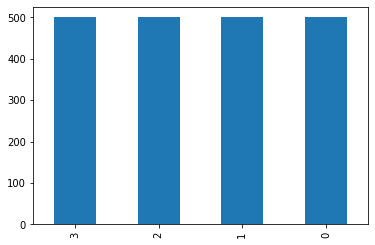

In [5]:
df['price_range'].value_counts().plot.bar();

In [6]:
X=df.drop('price_range',axis=1)
y=df.price_range

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [9]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1-LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.96      0.99      0.97        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



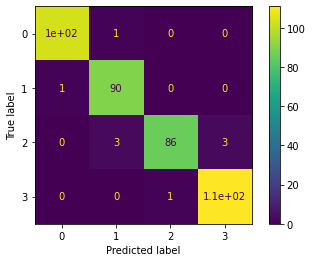

In [11]:
y_pred=lr.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test,y_pred))

### 2-LightGBM Classifier

In [12]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.85      0.93      0.89        91
           2       0.86      0.85      0.85        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



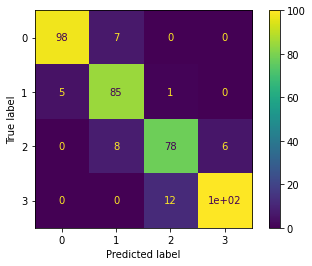

In [13]:
y_pred=lgb.predict(X_test)
plot_confusion_matrix(lgb, X_test, y_test)
print(classification_report(y_test,y_pred))

### 3-Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.82      0.84        91
           2       0.76      0.83      0.79        92
           3       0.92      0.87      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



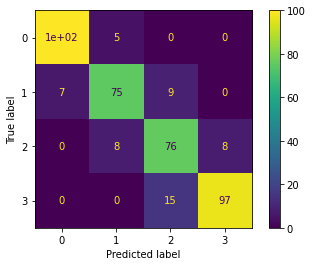

In [15]:
y_pred=rfc.predict(X_test)
plot_confusion_matrix(rfc, X_test, y_test)
print(classification_report(y_test,y_pred))

Best ML Model is Logistic Regression

**Optimal Component Number with PCA**

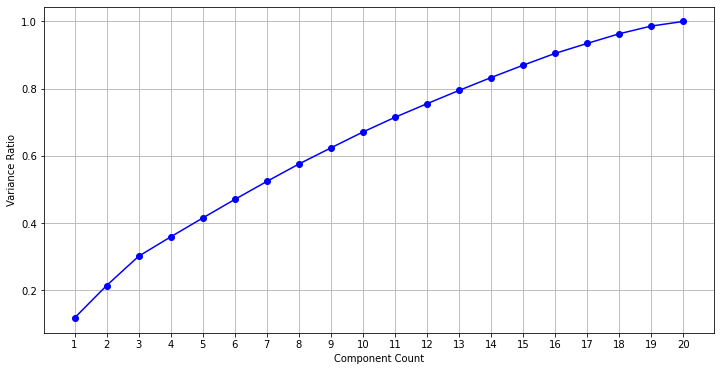

In [16]:
plt.figure(figsize=(12,6))
pca = PCA().fit(X_train)
x = range(1,21)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.xlabel("Component Count")
plt.ylabel("Variance Ratio")
plt.xticks(range(1,X_train.shape[1]+1))
plt.grid()
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.11763255, 0.09638818, 0.08723257, 0.05765494, 0.05614243,
       0.05526495, 0.05346244, 0.05188371, 0.04798986, 0.04729629,
       0.04376571, 0.04048462, 0.03950041, 0.03831728, 0.03673627,
       0.03524309, 0.02960188, 0.02869909, 0.0230604 , 0.01364333])

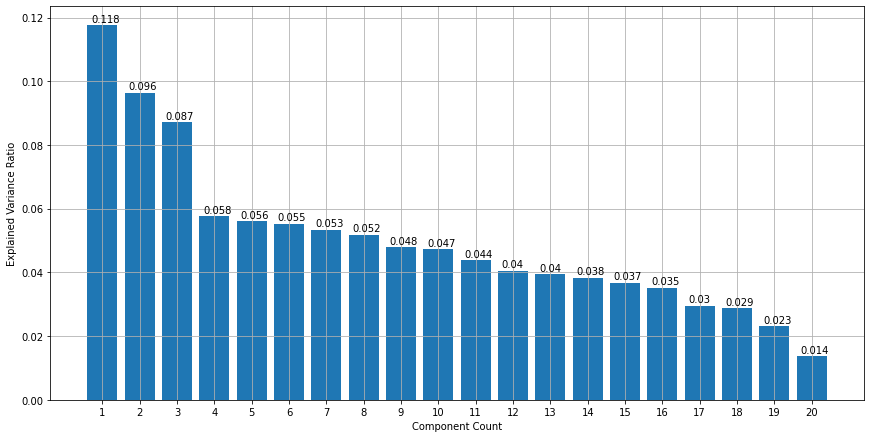

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(1,X_train.shape[1]+1), pca.explained_variance_ratio_)

for index,data in enumerate(pca.explained_variance_ratio_):
    ax.text(x=index+0.7 , y =data+0.001 , s=f"{round(data,3)}")
plt.tight_layout()
plt.xlabel("Component Count")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1,X_train.shape[1]+1))
plt.grid()
plt.show()

In [19]:
pca = PCA(n_components = 14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
sum(pca.explained_variance_ratio_)

0.8330159366677272

**if it can explain the variance over 80 percent, this is an acceptable rate**

In [20]:
pd.DataFrame(data = X_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.379686,0.668007,-0.211840,-0.113225,-0.054303,-0.158250,1.106907,0.389883,0.092434,0.668007,0.963254,-0.480647,0.699350,-0.040636
1,-1.078292,-0.657949,-0.244822,0.846260,0.305810,0.058634,-1.046993,-0.305894,-0.902669,-0.318289,-0.632871,-0.109328,0.805175,-0.060952
2,-0.087684,-0.028032,0.942980,0.125221,-0.142871,-0.078065,1.284818,0.394880,-0.822127,-0.770678,0.317895,-0.269383,0.194117,-1.032212
3,-0.476783,0.089601,0.324029,0.245706,1.471700,-0.353878,-0.076832,0.230973,-0.069662,0.170157,0.843023,0.762733,0.351217,-0.064782
4,0.571140,-0.177920,-0.690406,-0.327945,-0.300651,0.309281,-0.369681,0.105630,0.737397,-0.904050,0.343701,-0.761288,-0.234817,-0.486273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.193846,0.409990,-0.375305,0.267289,0.538491,1.069976,0.842850,0.905155,0.741194,-0.221691,-0.050360,-0.460106,-0.153471,-0.448932
1596,-0.979562,0.941579,0.431121,-0.400369,-0.345311,-0.332870,-0.621176,-0.918301,-1.406094,0.064220,0.725881,-0.201282,0.367932,0.405622
1597,-0.755004,0.547527,0.671969,-0.073663,-0.696546,-0.015778,-0.132556,0.916518,0.149029,-0.053149,0.654727,-0.145115,0.156800,-0.011905
1598,-0.054510,0.487370,0.615290,-0.563629,0.519883,0.571136,-0.829633,1.421128,0.467805,-0.351322,0.459427,-0.320065,0.575518,-0.503486


### LogisticRegression after PCA

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.92      0.95      0.93        91
           2       0.93      0.92      0.93        92
           3       0.96      0.96      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



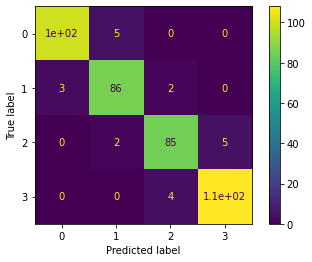

In [22]:
y_pred=lr.predict(X_test_pca)

from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(lr, X_test_pca, y_test)
print(classification_report(y_test,y_pred))

# Results
- We preferred Robust Scaler to Scandart Scaler. So, we got a bit better result. Because, Robust Scaler is durable to outliers.
- We trained 3 models: Logostoc Regression, LightGBM and Random Forest Classifier. We got the best accuracy score with logistic regression. Accuracy score was 0.98
- After applying PCA(Principal Component Analysis) with n_component=14, we could explain over 80% of the variance in data. With the help of PCA, we decreased the dimension of data from 20 to 14 and we retrained a model with the logistic regression algorithm and the dataset that was reduced dimension. This time, we got was 0.95 accuracy score.